In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import utils.matplotlib_init

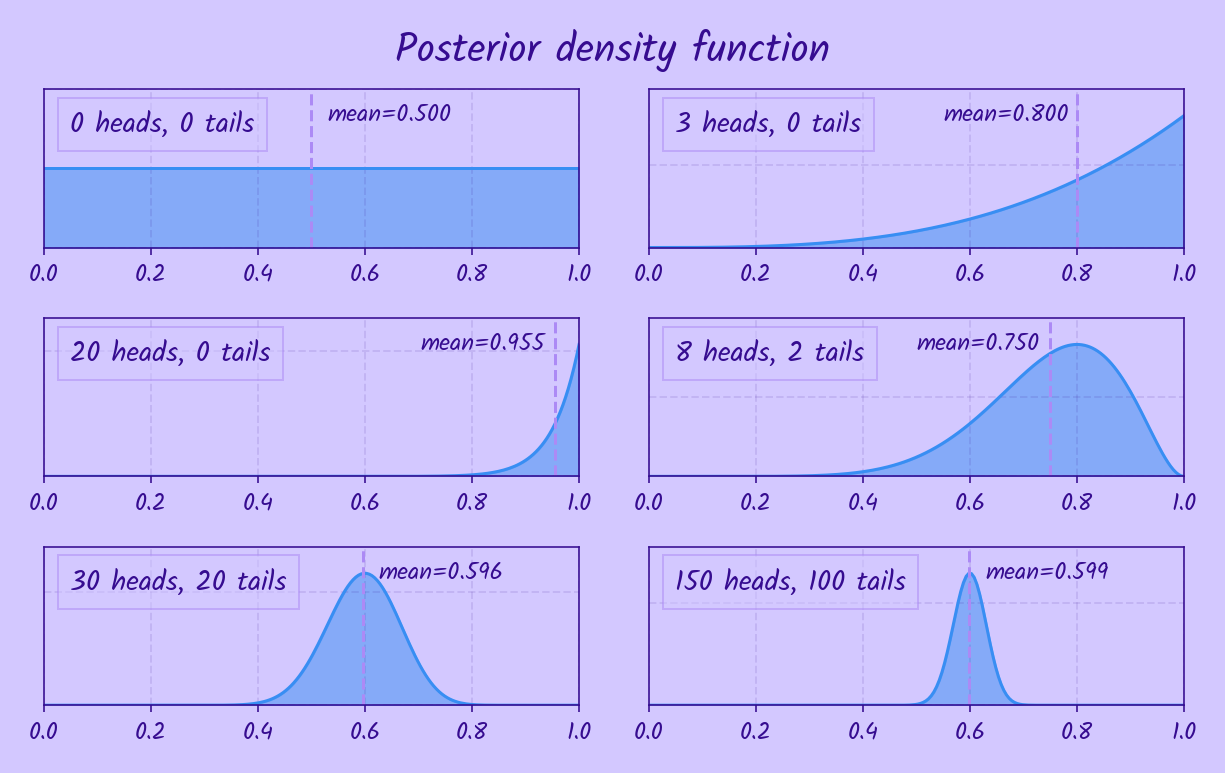

In [12]:
heads_tails = [[0, 0], [3, 0], [20, 0], [8, 2], [30, 20], [150, 100]]
x = np.linspace(0, 1, 200)

with plt.rc_context(rc={'legend.fontsize': 14, 'xtick.labelsize': 12, 'axes.grid': True}):
    for i, (heads, tails) in enumerate(heads_tails):
        y = ss.beta.pdf(x, heads + 1, tails + 1)
        mean_pdf = ss.beta.mean(heads + 1, tails + 1)
        ax = plt.subplot(321 + i)
        ax.set_xlim(0, 1)
        if i == 0:
            ylim = 2
        else:
            ylim = max(y * 1.2)
        ax.set_ylim(0, ylim)
        ax.yaxis.label.set_visible(False)
        plt.tick_params(axis='y', labelleft=False, left=False)
        
        plt.fill_between(x, y, color='C0', alpha=0.5)
        plt.plot(x, y, color='C0')
        ax.axvline(mean_pdf, linestyle='--', color='#AC8AF5')
        ax.text(0.05, 0.87, f'{heads} heads, {tails} tails', fontsize=14, transform=ax.transAxes, 
                verticalalignment='top', bbox={'facecolor': '#D3C8FF', 'alpha': 0.5, 'edgecolor': '#AC8AF5', 'pad': 6})
        ax.annotate(f'mean={mean_pdf:.3f}', xy=(mean_pdf + 0.03 if mean_pdf < 0.6 else mean_pdf - 0.25, ylim * 0.8), 
                    fontsize=12)

plt.suptitle('Posterior density function', fontsize=20)

plt.tight_layout(pad=1.5)
plt.subplots_adjust(top=0.9)